<a href="https://colab.research.google.com/github/nihal1521/Breast-Cancer-Prediction-/blob/main/Breast_cancer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CLASSIFYING BREAST CANCER SEVERITY USING K-NN, NAIVE BAYES, LOGISTIC REGRESSION and SVM**

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
x1 = dataset.iloc[:, 1]
x2 = dataset.iloc[:, 2]
x3 = dataset.iloc[:, 3]
x4 = dataset.iloc[:, 4]
x5 = dataset.iloc[:, 5]
x6 = dataset.iloc[:, 6]
x7 = dataset.iloc[:, 7]
x8 = dataset.iloc[:, 8]
x9 = dataset.iloc[:, 9]

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[ 7  6 10 ...  9 10  2]
 [ 8  3  8 ...  8  9  8]
 [ 8 10 10 ... 10 10  1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 [10  9  7 ...  7  7  1]]


In [ ]:
print(y_train)

[4 4 4 2 2 2 4 2 2 4 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 4 2 4
 2 2 2 4 2 2 2 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2 2 4 2 4 2 4 2 2 2 2 2 4
 2 2 4 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2 4 4 4 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2
 4 2 2 4 2 2 2 2 2 2 2 4 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 4 2 4 2 2 4 2 2 2 2
 2 2 2 4 4 4 4 2 4 2 4 2 4 4 4 2 2 4 2 2 2 2 4 4 2 2 2 4 2 2 4 2 2 2 2 4 4
 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 4 4 4 2 2 4 2 4 2 4 2 2 2 2 4 2
 4 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 2 4 2 2 4
 2 2 2 2 4 4 2 2 2 2 4 2 2 4 2 2 2 2 4 4 2 4 2 4 2 2 2 4 4 4 2 2 2 2 2 2 2
 2 4 4 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 2
 2 2 4 2 2 2 4 2 2 4 4 4 2 4 4 4 2 2 2 4 2 4 2 2 4 2 4 4 4 2 2 2 4 2 4 4 4
 2 2 2 4 2 4 2 2 2 2 4 4 2 2 2 4 4 2 2 4 2 2 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2
 4 2 2 2 2 4 4 2 2 4 4 2 2 4 4 4 2 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2 2
 4 2 4 2 4 2 2 4 2 2 2 2 4 2 2 2 4 2 2 4 4 4 4 2 4 4 2 4 4 2 2 2 2 2 2 4 2
 2 2 2 4 4 2 4 4 4 2 2 4 

In [ ]:
print(X_test)

[[1 1 1 ... 1 1 1]
 [3 1 1 ... 2 1 1]
 [5 5 5 ... 4 3 1]
 ...
 [5 1 1 ... 3 1 2]
 [2 2 2 ... 7 1 1]
 [2 1 1 ... 3 1 1]]


In [ ]:
print(y_test)

[2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2
 2 2 4 2 2 2 4 2 4 2 2 4 2 2 4 2 4 2 4 4 4 2 4 4 4 2 2 2 4 4 2 2 4 4 2 2 4
 2 2 4 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 4 2 2 4 2 2 4 2 4 2 2 2 4 2 2 2 2 4 2
 4 2 4 4 2 2 2 2 4 4 2 4 4 4 4 4 4 2 2 2 2 2 2]


## Feature Scaling Using Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.91903747  0.9407658   2.30881719 ...  2.22576767  2.27129602
   0.24623928]
 [ 1.27578287 -0.04290763  1.63138773 ...  1.82407819  1.94996317
   3.74830911]
 [ 1.27578287  2.25233038  2.30881719 ...  2.62745714  2.27129602
  -0.33743902]
 ...
 [-1.22143494 -0.69868992 -0.73961536 ... -0.98774815 -0.62069958
  -0.33743902]
 [-0.50794414 -0.69868992 -0.73961536 ... -0.58605867 -0.62069958
  -0.33743902]
 [ 1.98927367  1.92443923  1.29267301 ...  1.42238871  1.30729749
  -0.33743902]]


In [ ]:
print(X_test)

[[-1.22143494 -0.69868992 -0.73961536 ... -0.98774815 -0.62069958
  -0.33743902]
 [-0.50794414 -0.69868992 -0.73961536 ... -0.58605867 -0.62069958
  -0.33743902]
 [ 0.20554667  0.61287466  0.61524355 ...  0.21732028  0.02196611
  -0.33743902]
 ...
 [ 0.20554667 -0.69868992 -0.73961536 ... -0.18436919 -0.62069958
   0.24623928]
 [-0.86468954 -0.37079877 -0.40090064 ...  1.42238871 -0.62069958
  -0.33743902]
 [-0.86468954 -0.69868992 -0.73961536 ... -0.18436919 -0.62069958
  -0.33743902]]


## Training the K-NN, Naive Bayes, Logistic Regression and SVM model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_2 = GaussianNB()
classifier_2.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_3 = LogisticRegression(random_state = 0)
classifier_3.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.svm import SVC
classifier_4 = SVC(kernel = 'linear', random_state = 0)
classifier_4.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting A Single New Result

In [ ]:
print('KNN')
print(classifier.predict(sc.transform([[5, 1, 1, 1, 2, 1, 3, 1, 1]])))

KNN
[2]


In [ ]:
print('Naive Bayes')
print(classifier_2.predict(sc.transform([[5, 1, 1, 1, 2, 1, 3, 1, 1]])))

Naive Bayes
[2]


In [ ]:
print('Logistic Regression')
print(classifier_3.predict(sc.transform([[5, 1, 1, 1, 2, 1, 3, 1, 1]])))

Logistic Regression
[2]


In [ ]:
print('SVM')
print(classifier_4.predict(sc.transform([[5, 1, 1, 1, 2, 1, 3, 1, 1]])))

SVM
[2]


## Predicting the Test set results

In [ ]:
print('KNN')
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

KNN
[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [

In [ ]:
print("Naive Bayes")
y_pred_2 = classifier_2.predict(X_test)
print(np.concatenate((y_pred_2.reshape(len(y_pred_2),1), y_test.reshape(len(y_test),1)),1))

Naive Bayes
[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 

In [ ]:
print("Logistic Regression")
y_pred_3 = classifier_3.predict(X_test)
print(np.concatenate((y_pred_3.reshape(len(y_pred_3),1), y_test.reshape(len(y_test),1)),1))

Logistic Regression
[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]


In [ ]:
print('SVM')
y_pred_4 = classifier_4.predict(X_test)
print(np.concatenate((y_pred_4.reshape(len(y_pred_4),1), y_test.reshape(len(y_test),1)),1))

SVM
[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [

## Making the Confusion Matrix

In [ ]:
print("KNN")
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

KNN
[[103   4]
 [  5  59]]


In [ ]:
print('Naive Bayes')
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm_2 = confusion_matrix(y_test, y_pred_2)
print(cm_2)

Naive Bayes
[[99  8]
 [ 2 62]]


In [ ]:
print('Logistic Regression')
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm_3 = confusion_matrix(y_test, y_pred_3)
print(cm_3)

Logistic Regression
[[103   4]
 [  5  59]]


In [ ]:
print('SVM')
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm_4 = confusion_matrix(y_test, y_pred_4)
print(cm_4)

SVM
[[102   5]
 [  5  59]]


## ACCURACY SCORE

In [ ]:
print('KNN')
accuracy_score(y_test, y_pred)

KNN


0.9473684210526315

In [ ]:
print('Naive Bayes')
accuracy_score(y_test, y_pred_2)

Naive Bayes


0.9415204678362573

In [ ]:
print('Logistic Regression')
accuracy_score(y_test, y_pred_3)

Logistic Regression


0.9473684210526315

In [ ]:
print('SVM')
accuracy_score(y_test, y_pred_4)

SVM


0.9415204678362573

## GRAPHS

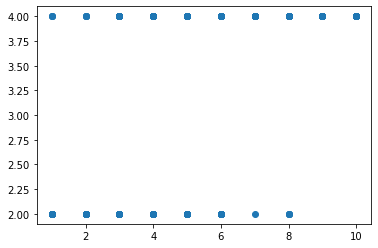

In [ ]:
plt.scatter(x1, y)

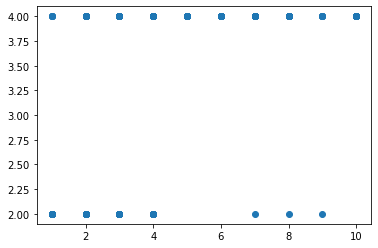

In [ ]:
plt.scatter(x2, y)


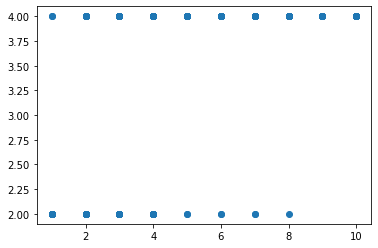

In [ ]:
plt.scatter(x3, y)


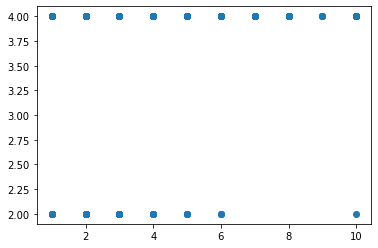

In [ ]:
plt.scatter(x4, y)


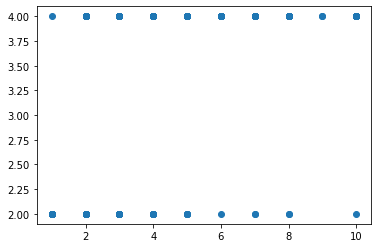

In [ ]:
plt.scatter(x5, y)


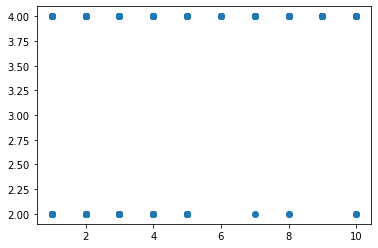

In [ ]:
plt.scatter(x6, y)


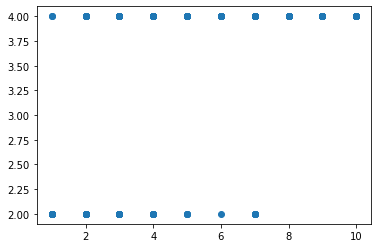

In [ ]:
plt.scatter(x7, y)


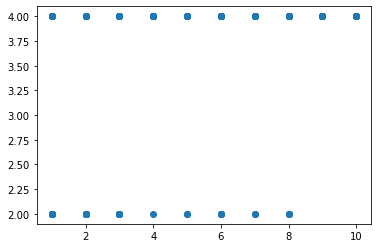

In [ ]:
plt.scatter(x8, y)


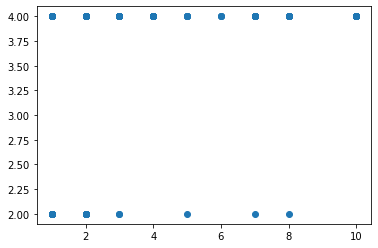

In [ ]:
plt.scatter(x9, y)